In [1]:
using Plots
using JLD2 
using LatticeAlgorithms
using BlockDiagonals

# Fig 4a for fidelity

In [2]:
Nmin = 1
Nmax = 20
fn = "data/repetition_codes/fidelity_time_YY_rep_rec_$(Nmin)_$(Nmax).jld2";
datalist = load(fn)
Nrange = datalist["Nrange"]
σrange = datalist["σrange"]

p0list = []
timelist = []
for item in datalist["datalist"]
    push!(p0list, item[1])
    push!(timelist, item[2])    
end

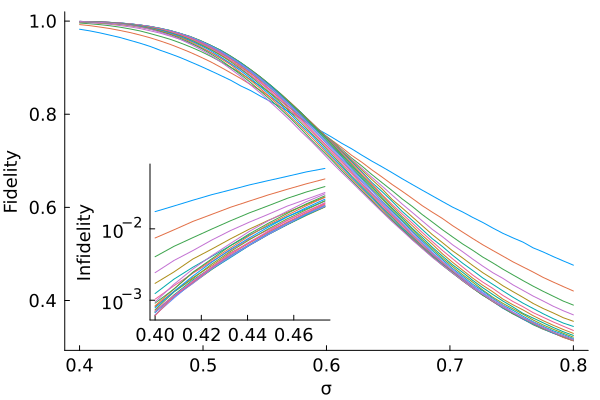

In [3]:
plot()
ind1 = 1
ind2 = 10
xlabel!("σ")
ylabel!("Fidelity")
for ind = 1 : 20
    plot!(σrange, [p0[ind] for p0 in p0list]) # , label="N=$Nrange[ind]")
    
    if ind==1
        plot!(σrange[ind1:ind2], 
            [1-p0[ind] for p0 in p0list][ind1:ind2], 
#             inset = bbox(0.02, 0.6, 0.3, 0.35, :bottom, :right),
            inset = bbox(0.45, 0.2, 0.3, 0.39, :bottom, :right),
            subplot = 2,            
            grid = false,
            legend=false            
        )
    else
        plot!(σrange[ind1:ind2], 
            [1-p0[ind] for p0 in p0list][ind1:ind2], 
            subplot = 2,            
            grid = false,
            legend=false
        )        
    end         
end
plot!(grid=false, tickfontsize=12, labelfontsize=12, legend=false)
plot!(yaxis=:log, subplot=2, ylabel="Infidelity")

# plot!([0.74,0.77],[0.33, 0.33],arrow=true,color=:black,linewidth=1)
# annotate!(0.71, 0.33, "N=30")

# plot!([0.79,0.79],[0.55, 0.5],arrow=true,color=:black,linewidth=1)
# annotate!(0.78, 0.58, "N=2")

# plot!([0.41,0.41],[0.90, 0.96],arrow=true,color=:black,linewidth=1)
# annotate!(0.41, 0.88, "N=2")

# plot!([0.54,0.57],[0.76, 0.76],arrow=true,color=:black,linewidth=1)
# annotate!(0.51, 0.76, "N=40")

# plot!([0.512,0.482],[0.98, 0.98],arrow=true,color=:black,linewidth=1)
# annotate!(0.54, 0.98, "N=28")

In [4]:
savefig("plots/fidelity_YY_rep_rec.pdf") ; 

# Fig 4b for runtime

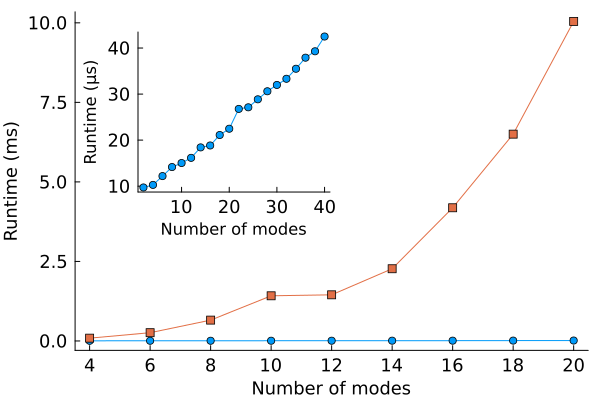

In [5]:
data = load("data/repetition_codes/runtime_YY_rep_rec.jld2")
Nrange = data["Nrange"]
time_exp = data["time_exp"]
time_linear = data["time_linear"];

ind = 2
plot(2*Nrange[ind:end], time_linear[ind:end]*1e3, marker=:circle, label="Linear decoder", legend=false)
plot!(2*Nrange[ind:end], time_exp[ind:end]*1e3, marker=:square, label="Conventional decoder", legend=false)


xlabel!("Number of modes")
# ylabel!("Runtime (" * L"10^{-3}" * "second)")
ylabel!("Runtime (ms)")
plot!(grid=false, tickfontsize=12, labelfontsize=12, legend=false,xticks=2:2:20)

plot!(2*(1:20), sum(timelist)/length(σrange)*1e6, marker=:circle, legend = false,
    inset = bbox(0.45, 0.52, 0.32, 0.4, :bottom, :right),
    subplot = 2,
    grid=false,
    tickfontsize=12,
    xlabel="Number of modes",
    ylabel="Runtime (μs)",
)


In [6]:
savefig("plots/runtime_YY_rep_rec.pdf") ; 